## Get daily gold price in Korea

### Information
- Source: Naver
- Data: daily gold price (KRW)
- Link: https://finance.naver.com/marketindex/goldDailyQuote.nhn

In [93]:
# import 
import pandas as pd
import numpy as np

In [94]:
addr = 'https://finance.naver.com/marketindex/goldDailyQuote.nhn?&page={page}'

### Preview site
- last page is 362

In [95]:
df_gold = pd.DataFrame()
for i in range(1,363):
  url = addr.format(page=i)
  df_gold_page = pd.read_html(url)[0]
  df_gold_page.columns = df_gold_page.columns.droplevel(0)
  df_gold_page = df_gold_page.drop(['사실 때','파실 때','입금 시','해지 시'], axis=1)
  df_gold = df_gold.append(df_gold_page, ignore_index=True)

In [96]:
df_gold

,날짜,매매기준율,전일대비,기준 국제 금 시세,기준 원달러 환율
0,2021.05.21,68060.62,74.09,1876.06,1128.5
1,2021.05.20,68134.71,310.62,1871.47,1132.5
2,2021.05.18,67824.09,196.48,1869.54,1128.5
3,2021.05.17,67627.61,1080.69,1853.45,1135.0
4,2021.05.14,66546.92,453.54,1835.15,1128.0
...,...,...,...,...,...
3607,2006.11.07,18874.39,134.84,625.39,938.8
3608,2006.11.06,19009.23,213.76,626.39,944.0
3609,2006.11.03,18795.47,241.74,623.64,937.5
3610,2006.11.02,18553.73,192.93,615.29,938.0


In [97]:
df_gold['date'] = pd.to_datetime(df_gold['날짜'], format='%Y.%m.%d')

In [98]:
df_gold

,날짜,매매기준율,전일대비,기준 국제 금 시세,기준 원달러 환율,date
0,2021.05.21,68060.62,74.09,1876.06,1128.5,2021-05-21
1,2021.05.20,68134.71,310.62,1871.47,1132.5,2021-05-20
2,2021.05.18,67824.09,196.48,1869.54,1128.5,2021-05-18
3,2021.05.17,67627.61,1080.69,1853.45,1135.0,2021-05-17
4,2021.05.14,66546.92,453.54,1835.15,1128.0,2021-05-14
...,...,...,...,...,...,...
3607,2006.11.07,18874.39,134.84,625.39,938.8,2006-11-07
3608,2006.11.06,19009.23,213.76,626.39,944.0,2006-11-06
3609,2006.11.03,18795.47,241.74,623.64,937.5,2006-11-03
3610,2006.11.02,18553.73,192.93,615.29,938.0,2006-11-02


In [99]:
df_gold = df_gold.rename(columns={'매매기준율':'price(KRW)', '전일대비':'change', '기준 국제 금 시세':'interPrice(USD)','기준 원달러 환율':'currency(USD-KRW)'})

In [100]:
df_gold

,날짜,price(KRW),change,interPrice(USD),currency(USD-KRW),date
0,2021.05.21,68060.62,74.09,1876.06,1128.5,2021-05-21
1,2021.05.20,68134.71,310.62,1871.47,1132.5,2021-05-20
2,2021.05.18,67824.09,196.48,1869.54,1128.5,2021-05-18
3,2021.05.17,67627.61,1080.69,1853.45,1135.0,2021-05-17
4,2021.05.14,66546.92,453.54,1835.15,1128.0,2021-05-14
...,...,...,...,...,...,...
3607,2006.11.07,18874.39,134.84,625.39,938.8,2006-11-07
3608,2006.11.06,19009.23,213.76,626.39,944.0,2006-11-06
3609,2006.11.03,18795.47,241.74,623.64,937.5,2006-11-03
3610,2006.11.02,18553.73,192.93,615.29,938.0,2006-11-02


In [101]:
df_gold.drop('날짜', axis=1, inplace=True)
df_gold

,price(KRW),change,interPrice(USD),currency(USD-KRW),date
0,68060.62,74.09,1876.06,1128.5,2021-05-21
1,68134.71,310.62,1871.47,1132.5,2021-05-20
2,67824.09,196.48,1869.54,1128.5,2021-05-18
3,67627.61,1080.69,1853.45,1135.0,2021-05-17
4,66546.92,453.54,1835.15,1128.0,2021-05-14
...,...,...,...,...,...
3607,18874.39,134.84,625.39,938.8,2006-11-07
3608,19009.23,213.76,626.39,944.0,2006-11-06
3609,18795.47,241.74,623.64,937.5,2006-11-03
3610,18553.73,192.93,615.29,938.0,2006-11-02


In [102]:
df_gold = df_gold.set_index('date')

In [103]:
df_gold

,price(KRW),change,interPrice(USD),currency(USD-KRW)
date,,,,
2021-05-21,68060.62,74.09,1876.06,1128.5
2021-05-20,68134.71,310.62,1871.47,1132.5
2021-05-18,67824.09,196.48,1869.54,1128.5
2021-05-17,67627.61,1080.69,1853.45,1135.0
2021-05-14,66546.92,453.54,1835.15,1128.0
...,...,...,...,...
2006-11-07,18874.39,134.84,625.39,938.8
2006-11-06,19009.23,213.76,626.39,944.0
2006-11-03,18795.47,241.74,623.64,937.5


In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='date', ylabel='price(KRW)'>

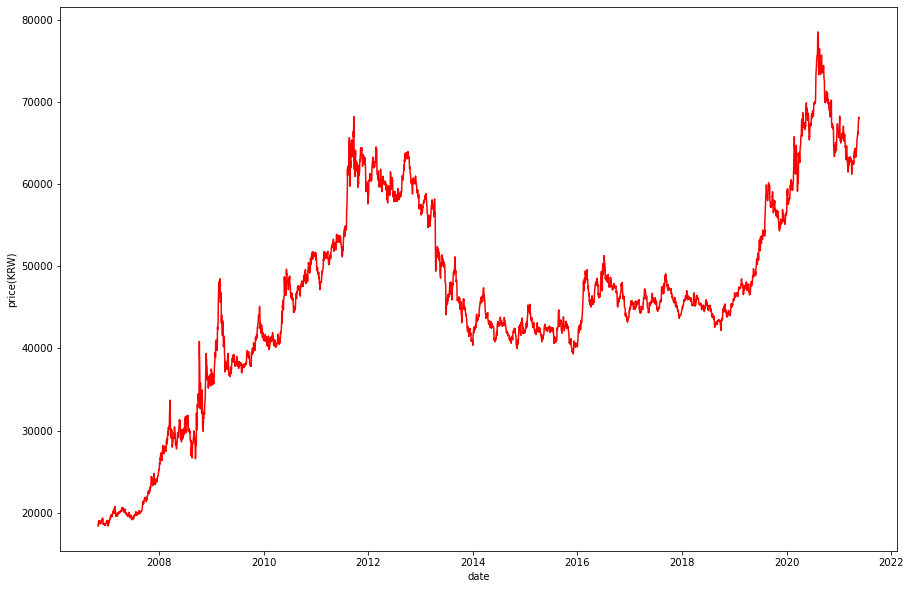

In [108]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_gold, x='date', y='price(KRW)', color='r')

In [106]:
df_gold.to_csv('daily_gold_price_korea.csv')